# IMPORTS

In [593]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mltools import *
from sklearn.metrics import accuracy_score

# STRUCTURES DE BASE

In [515]:
class Loss(object):
    def forward(self, y, yhat):
        pass

    def backward(self, y, yhat):
        pass

In [516]:
class Module(object):
    def __init__(self):
        self._parameters = None
        self._gradient = None

    def zero_grad(self):
        ## Annule gradient
        pass

    def forward(self, X):
        ## Calcule la passe forward
        pass

    def update_parameters(self, gradient_step=1e-3):
        ## Calcule la mise a jour des parametres selon le gradient calcule et le pas de gradient_step
        self._parameters -= gradient_step*self._gradient

    def backward_update_gradient(self, input, delta):
        ## Met a jour la valeur du gradient
        pass

    def backward_delta(self, input, delta):
        ## Calcul la derivee de l'erreur
        pass

# TRANSFORMATIONS

In [517]:
class TanH(Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, X):
        return np.tanh(X) # transformation
    
    def backward_update_gradient(self, X, delta=1):
        return (1 - self.forward(X)**2) * delta # d'après la dérivée en fonction de X de tanh(X), delta joue le rôle de constante.
    
    def update_parameters(self, gradient_step=1e-3):
        pass # nous n'avons pas de paramètre dans ce modèle

In [518]:
def sigmoide(X):
    return 1/(1+np.exp(-X)) # sigmoide n'existe pas dans NumPy, nous l'implémentons ici.

class Sigmoide(Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, X):
        return sigmoide(X)
    
    def backward_update_gradient(self, X, delta=1):
        return (np.exp(-X) * sigmoide(X) / (1+np.exp(-X))) * delta # d'après la dérivée en fonction de X de sigmoide(X) (avec une constante lambda de 1), delta joue le rôle de constante.
    
    def update_parameters(self, gradient_step=1e-3):
        pass # nous n'avons pas de paramètre dans ce modèle

In [519]:
class Softmax(Module):
    def __init__(self):
        super().__init__(self)
        
    def forward(self, Z):
        e = np.exp(Z)
        return e / np.sum(e, axis=1)
    
    def backward_delta(self, Z, delta=1): # Jacobian of Softmax function
        forw = self.forward(Z)
        return forw * (1-forw) * delta
    
    def update_parameters(self, gradient_step=1e-3):
        pass # nous n'avons pas de paramètre dans ce modèle

# DONNÉES

### Tools

In [668]:
def normalize(vector): # takes a vector of numbers and return a normalized vector between 0 and 1 (both included)
    return ((vector - np.min(vector))/(np.max(vector)-np.min(vector))).astype(float)

def onehot(vector): # transforms vector in onehot (normalized)
    cpt = 0
    values = np.unique(vector)
    onehot = np.zeros(vector.shape)
    for v in values[1:]:
        cpt += 1
        onehot[vector==v] = float(cpt)
    return onehot/cpt

## RÉGRESSION

In [669]:
reg = pd.read_csv("datasets/insurance.csv").to_numpy()

print("Raw example")
print(reg[0])

# NORMALIZATION OF AGES
print("\n10 first ages before normalization")
print(reg[:10,0])
reg[:,0] = normalize(reg[:,0])
print("\n10 first ages after normalization")
print(reg[:10,0])

# ONE HOT SEXES
print("\n10 first sexes before onehot processing :")
print(reg[:10,1])
reg[:,1] = onehot(reg[:,1])
print("\n10 first sexes after onehot processing :")
print(reg[:10,1])

# CMI NORMALIZATION
print("\n10 first CMIs before normalization")
print(reg[:10,2])
reg[:,2] = normalize(reg[:,2])
print("\n10 first CMIs after normalization")
print(reg[:10,2])

# CHILDREN NUMBER NORM
print("\n10 first children numbers before normalization")
print(reg[:10,3])
reg[:,3] = normalize(reg[:,3])
print("\n10 first children numbers after normalization")
print(reg[:10,3])

# ONE HOT SMOKERS
print("\n10 first smoking habits before onehot processing :")
print(reg[:10,4])
reg[:,4] = onehot(reg[:,4])
print("\n10 first smoking habits after onehot processing :")
print(reg[:10,4])

# ENCODING REGION OF LIVING
print("\n10 first regions of living before encoding :")
print(reg[:10,5])
reg[:,5] = onehot(reg[:,5])
print("\n10 first regions of living after encoding :")
print(reg[:10,5])

# MEDICAL COSTS (VALUES TO PREDICT)
print("\n10 first medical costs before normalization :")
print(reg[:10,6])
reg[:,6] = normalize(reg[:,6])
print("\n10 first medical costs after normalization :")
print(reg[:10,6])

Raw example
[19 'female' 27.9 0 'yes' 'southwest' 16884.924]

10 first ages before normalization
[19 18 28 33 32 31 46 37 37 60]

10 first ages after normalization
[0.021739130434782608 0.0 0.21739130434782608 0.32608695652173914
 0.30434782608695654 0.2826086956521739 0.6086956521739131
 0.41304347826086957 0.41304347826086957 0.9130434782608695]

10 first sexes before onehot processing :
['female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'female']

10 first sexes after onehot processing :
[0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]

10 first CMIs before normalization
[27.9 33.77 33.0 22.705 28.88 25.74 33.44 27.74 29.83 25.84]

10 first CMIs after normalization
[0.3212267958030669 0.479149852031208 0.4584342211460855
 0.18146354587032545 0.3475921442023136 0.26311541565778845
 0.47027172450901256 0.3169222491256389 0.37315039009954254
 0.265805757331181]

10 first children numbers before normalization
[0 1 3 0 0 0 1 3 2 0]

10 first children numbers after normaliz

## CLASSIFICATION

### CLASSFICATION BINAIRE

In [701]:
bincl = pd.read_csv("datasets/breast-cancer.csv").to_numpy()
bincl = bincl[:,1:] # we don't need ids in our dataset

bincl[:,0] = onehot(bincl[:,0]).astype(int)
for column in range(1,bincl[0,:].size):
    bincl[:,column] = normalize(bincl[:,column])

# LOSS FUNCTIONS

In [702]:
class MSE(Loss):
    def forward(self, y, yhat):
        # return np.linalg.norm((y - yhat).astype(float), axis=1)**2 # axis=1 to have batch vectors
        return np.trace((y - yhat).T @ (y - yhat))
    
    def backward(self, y, yhat):
        return -2 * (y - yhat) # taille batch*d, gradient de la MSE en fonction des yhat.

In [703]:
class CE(Loss):
    def forward(self, y, yhat): # y and yhat are matrix
        return -np.sum(y*np.log(yhat), axis=1)
    
    def backward(self, y, yhat):
        return -y/yhat

In [704]:
class BCE(CE):
    def forward(self, y, yhat):
        return CE.forward(y,yhat)
    
    def backward(self, y, yhat):
        return y/yhat + (1-y)/(1-yhat)

In [705]:
class KLDivergence(Loss):
    def forward(self, y, yhat):
        return -np.sum(y*np.log(yhat/y), axis=1)
    
    def backward(self, y, yhat):
        return -y/yhat

Since $\dfrac{\partial}{\partial x} log \displaystyle{\sum^{K}_{i=1}} e^{x_i} = 0$ (right member of the logSoftmax Cross-entropy), then we have :

In [706]:
class CElogSoftMax(CE):
    def forward(self, y, yhat):
        return CE.forward(y, np.log(Softmax.forward(yhat)))
    
    def backward(self, y, yhat):
        return CE.backward_delta(y, yhat) # partial derivative of log (sum e^x) on x = 0

# MODULES

In [707]:
class Linear(Module):
    def __init__(self, input, output):
        super().__init__()
        self.input = input
        self.output = output
        self._parameters = 2 * (np.random.rand(self.input, self.output) - 0.5) # (batch*input @ input*output) -> (batch*output) pour forward pass
        self._gradient = np.zeros(self._parameters.shape)
    
    def zero_grad(self): # reinitialise à 0 le gradient
        self._gradient = np.zeros(self._parameters.shape)
    
    def forward(self, X): # X.shape = batch*input
        return X @ self._parameters # sans biais
        
    def backward_update_gradient(self, X, delta):
        self._gradient += X.T @ delta
        
    def backward_delta(self, X, delta):
        return delta @ self._parameters.T

## TESTS MODULE LINÉAIRE

In [708]:
# MODULE DE RÉGRESSION LINÉAIRE

epochs=500
gradient_step=1e-4

class LinearRegression:
    
    def __init__(self, nn, loss):
        self.nn = nn
        self.loss = loss
    
    def fit(self, X, y, epochs=epochs, gradient_step=gradient_step):
        
        X = X.astype(float)
        y = y.astype(float)
        losses = []

        for i in range(epochs):
            # Forward pass
            yhat = self.nn.forward(X) # yhat = z^k = M^k(z^k-1, W^k)
            losses.append(self.loss.forward(y,yhat))

            # Backward pass
            last_delta = self.loss.backward(y, yhat) # delta de la dernière couche
            self.nn.backward_update_gradient(X, last_delta)
            self.nn.update_parameters(gradient_step=gradient_step)
            self.nn.zero_grad()
            
        return losses
    
    def predict(self, X):
        return self.nn.forward(X)
    
    def score(self, y, yhat):
        return self.loss.forward(y, yhat)

### TESTS RÉGRESSION LINÉAIRE

In [723]:
# INITIALISATION DES DONNÉES, DU RÉSEAU DE NEURONES ET DE LA LOSS FUNCTION
y = reg[:,-1]
X = reg[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

In [724]:
nn = Linear(X_train.shape[1],y_train.shape[1])
loss = MSE()

epochs=200
gradient_step=1e-4

In [725]:
lr = LinearRegression(nn, loss)
losses = lr.fit(X_train,y_train, epochs=epochs, gradient_step=gradient_step)
yhat = lr.predict(X_test)
print(lr.score(y_test, yhat))

2.7766445560245208


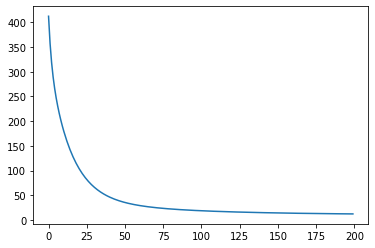

In [726]:
plt.plot(list(range(epochs)), losses)
plt.show()

### TESTS CLASSIFICATION BINAIRE

In [772]:
# INITIALISATION DES DONNÉES, DU RÉSEAU DE NEURONES ET DE LA LOSS FUNCTION
y = bincl[:,0]
X = bincl[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

In [773]:
nn = Linear(X_train.shape[1],y_train.shape[1])
loss = MSE()

epochs=1000
gradient_step=1e-4

In [774]:
lr = LinearRegression(nn, loss)
losses = lr.fit(X_train,y_train, epochs=epochs, gradient_step=gradient_step)
yhat = lr.predict(X_test).reshape(y_test.shape)
yhat = np.where(yhat>=0.5, 1, 0)
print(lr.score(y_test, yhat))

5


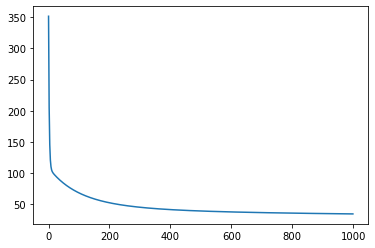

In [775]:
plt.plot(list(range(epochs)), losses)
plt.show()

In [776]:
score = (np.where(y_test - yhat == 0, 1, 0).sum()) / y_test.size
print(score)

0.956140350877193


## TESTS MODULE NON LINÉAIRE

### TWO LAYERS NETWORK IMPLEMENTATION

In [ ]:
layer1 = LinearRegression(Linear())